# Project: Investigate a TMDb Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

In this project of my Data Analysis, I am investigating a TMDb movies database file which has collection of important detials of about 10k+ movies, including their details of budget, revenue, release dates, etc.

### Questions I plan on asking:
1. Does the amount of budget spent define whether or not a movie will recieve a higher rating.
2. Can low budget films garn a higher rating.
3. By how much have the profits increased over time?
4. Has the following(popularity) of movies increased drastically over the years?

In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
import pandas as pd
import numpy as np
% matplotlib inline
import matplotlib.pyplot as plt

<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


### Data Cleaning 

In this section I'll take an initial view of the data - this will also include the number of rows, the datatypes and the number of non-null values in those columns. I'll also take a look at the number of unique values for those columns.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [4]:
df.nunique()

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64

First, lets clean up the columns. We will only keep the columns we need and remove the rest of them.

Columns to delete - 'cast', 'homepage','overview', 'tagline', 'keywords'.

In [5]:
# Deleting all unwanted headers
df = df.drop(['cast', 'homepage','overview', 'tagline', 'keywords'], axis = 1)

In [6]:
# Converting release_date to datetime
df['release_date'] = pd.to_datetime(df['release_date'])


In [7]:
# Confirmng the data type
type(df['release_date'][0])

pandas._libs.tslib.Timestamp

In [8]:
# Change missing null values to 'NA'
df['director'] = df['director'].fillna('NA')
df['production_companies'] = df['production_companies'].fillna('NA')
df['genres'] = df['genres'].fillna('NA')

In [9]:
#Confirming the changes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 16 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
director                10866 non-null object
runtime                 10866 non-null int64
genres                  10866 non-null object
production_companies    10866 non-null object
release_date            10866 non-null datetime64[ns]
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              10866 non-null float64
revenue_adj             10866 non-null float64
dtypes: datetime64[ns](1), float64(4), int64(6), object(5)
memory usage: 1.3+ MB


In [10]:
#Now we will drop duplicates but will keep the first versions
df.drop_duplicates(keep = 'first', inplace = True)


In [11]:
# Give numerical data defining currencies for better visuals and understanding
df.rename(columns = {'budget' : 'budget_(in_US-Dollars)', 'revenue' : 'revenue_(in_US-Dollars)'}, inplace = True)

In [12]:
df.insert(2, 'profit_(in_US_Dollars)', df['revenue_(in_US-Dollars)'] - df['budget_(in_US-Dollars)'])

#checking the results
df.head()

,id,imdb_id,profit_(in_US_Dollars),popularity,budget_(in_US-Dollars),revenue_(in_US-Dollars),original_title,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,1363528810,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,228436354,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,185238201,13.112507,110000000,295238201,Insurgent,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,1868178225,11.173104,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,1316249360,9.335014,190000000,1506249360,Furious 7,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09


In [13]:
# Checking changes columns
df.head()

,id,imdb_id,profit_(in_US_Dollars),popularity,budget_(in_US-Dollars),revenue_(in_US-Dollars),original_title,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,1363528810,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,228436354,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,185238201,13.112507,110000000,295238201,Insurgent,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,1868178225,11.173104,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,1316249360,9.335014,190000000,1506249360,Furious 7,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09


<a id='eda'></a>
## Exploratory Data Analysis

### 1. Voting average for the Cheapest and Most Expensive Movies
This observation is used to analyze whether the amount of money spent translates to a better overall rating

### Cheap Movies 


In [14]:
# Get the cheapest movies with ratings
 
least_budget = df.sort_values(by=['budget_adj'], ascending = True).head(300)

In [15]:
#Grouping the data on the basis of voting average 

least_budget.groupby('original_title')['vote_average'].mean()

original_title
100 Bloody Acres                               5.5
101 Dalmatians II: Patch's London Adventure    5.7
2-Headed Shark Attack                          3.4
3, 2, 1... Frankie Go Boom                     5.2
A Bride for Christmas                          5.8
A Dark Truth                                   5.6
A Fairly Odd Christmas                         5.3
A Little Bit Zombie                            5.9
Absolon                                        5.0
Adam and Dog                                   6.0
After                                          5.6
Airborne                                       3.3
All I Want For Christmas                       6.0
Amber Alert                                    5.0
American Mary                                  5.9
American Splendor                              6.7
Amy Schumer: Mostly Sex Stuff                  7.1
Another Woman                                  5.8
Anything Else                                  6.1
Artifact        

In [16]:
# Saving the grouped data into a variable
cheap_voter_count = least_budget.groupby('original_title')['vote_average'].mean()

### Expensive movies

In [17]:
#Sorting the data 
high_budget = df.sort_values(by=['budget_adj'], ascending = False).head(300)

In [18]:
#Grouping the data on the basis of voting average 

high_budget.groupby('original_title')['vote_average'].mean()

original_title
2012                                   5.6
47 Ronin                               5.8
4: Rise of the Silver Surfer           5.4
55 Days at Peking                      5.6
A Bug's Life                           6.6
A Christmas Carol                      6.6
A.I. Artificial Intelligence           6.6
After Earth                            5.1
Alexander                              5.6
Ali                                    6.7
Alice in Wonderland                    6.3
Angels & Demons                        6.3
Ant-Man                                7.0
Armageddon                             6.4
Around the World in 80 Days            5.6
Atlantis: The Lost Empire              6.5
Australia                              6.3
Avatar                                 7.1
Avengers: Age of Ultron                7.4
Babe: Pig in the City                  5.1
Backdraft                              6.2
Bad Boys II                            6.3
Batman & Robin                         

In [19]:
#Storing the grouped and sorted data into a variable
expensive_voter_count = high_budget.groupby('original_title')['vote_average'].mean()

### Comparing the results using hist graph
Below is a graph detailing the variations in both data's

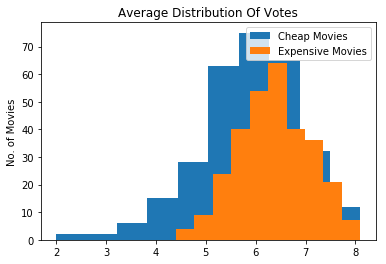

In [20]:
plt.hist(cheap_voter_count, alpha=1, label='Cheap Movies')
plt.hist(expensive_voter_count, alpha=1, label='Expensive Movies')
plt.ylabel('No. of Movies')
plt.title('Average Distribution Of Votes')
plt.legend(loc='upper right')
plt.show()

### Conclusions on high and low budget movies based on average vote:
On observation, we saw that the movies with higher budgets recieved a higher average rating as compared to the low bugdet films.

### 2. Changes in popularity and revenue earned(profits) over the years

/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2910: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f969e2c4978>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f969df01780>]], dtype=object)

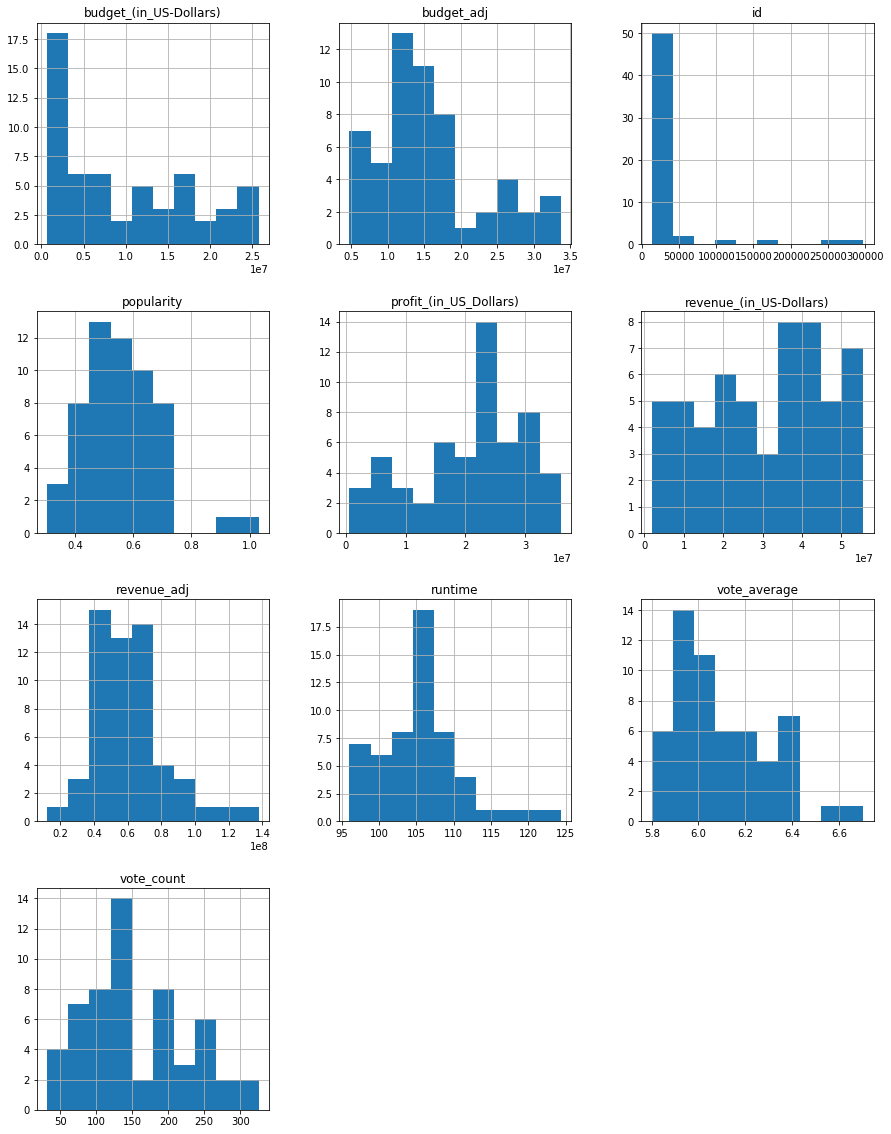

In [21]:
sorted_year = df.groupby('release_year').mean()
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
sorted_year.hist(ax = ax)

### Observations on popularity over time

### The below histogram represents the change in popularity over time

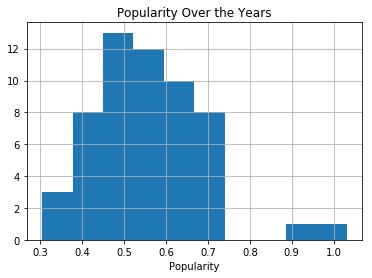

In [22]:
# The below code is used to create a histogram for the sorted data, and xlabel and title is given for representation
sorted_year['popularity'].hist()
plt.xlabel('Popularity')
plt.title('Popularity Over the Years');

In [23]:
#This gives us a brief description of the data
sorted_year['popularity'].describe()

count    56.000000
mean      0.559551
std       0.128254
min       0.304112
25%       0.469625
50%       0.546928
75%       0.626697
max       1.030657
Name: popularity, dtype: float64

### Conclusions on popularity of movies over time
As we can see:
1. No movies recieved an average rating between 0.72 and 0.88.
2. The graph is skewed to the right
3. A very low percentile of movies recieved a rating between 0.9 and 1.4.

### Observations on profits over time

### The below histogram represents the change in profits earned over time

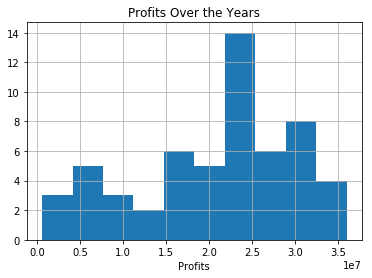

In [24]:
# The below code is used to create a histogram for the sorted data, and xlabel and title is given for representation
sorted_year['profit_(in_US_Dollars)'].hist()
plt.xlabel('Profits')
plt.title('Profits Over the Years');

In [25]:
#This gives us a brief description of the data
sorted_year['profit_(in_US_Dollars)'].describe()

count    5.600000e+01
mean     2.092585e+07
std      9.121204e+06
min      5.909106e+05
25%      1.585978e+07
50%      2.284545e+07
75%      2.695966e+07
max      3.594547e+07
Name: profit_(in_US_Dollars), dtype: float64

### Conclusions on profits over time
1. Most profits fall in the range between 2.284545e+07 and 2.695966e+07.
2. The graph is skewed to the right

### Profit vs Popularity:

Here, we view just how popularity and revenue are related using a scatterplot

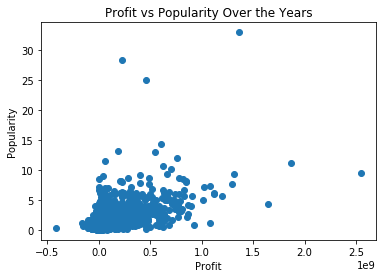

In [29]:
# Creating a scatterplot of profit and popularity over the years
plt.scatter(x=df['profit_(in_US_Dollars)'], y=df['popularity'])
plt.xlabel('Profit')
plt.ylabel('Popularity')
plt.title('Profit vs Popularity Over the Years');

### Observations- Profit vs Popularity:

1. The correlation computed from function is evident in the scatterplot.
2. Popularity is proportional to revenues.
3. The few outliers that grossed medium but were rated extremely high need to be looked into.



### Profit vs Vote counts:

Here, we view how vote counts and revenue are related using a scatterplot.

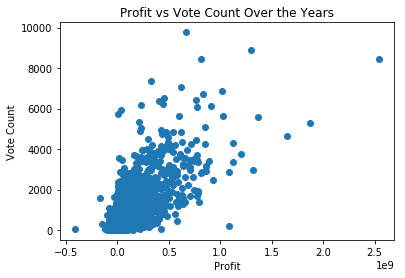

In [32]:
# Creating a scatterplot of profit and vote counts over the years
plt.scatter(x=df['profit_(in_US_Dollars)'], y=df['vote_count'])
plt.xlabel('Profit')
plt.ylabel('Vote Count')
plt.title('Profit vs Vote Count Over the Years');


### Observations- Profits vs Vote Count:

1. The correlation computed from function is evident in the scatterplot.
2. Vote count is roughly proportional to revenues.
3. Even in this plot, we observe that a few sample had high counts but did not gross commensurately in revenue.
4. This plot points us to scrutinize the vote counts and type of votes if possible or any other factors influencing voting such as genres, cast, etc.



### Limitations:

1. In the above analysis, we have worked with runtimes, popularity and revenues.
2. In case of varying currencies [which is likely since the movies range from different regions], exchange rates or conversions or some sort of normalization would need to be applied.
3. We also do not consider different revenue sources like movies ticket sales, audio rights sales, digital sales, braodcast sales, etc. and disregard the period and markets over which the revenues are collected. Older movies that are cast over television or re-released and might garner higher revenues are examples of limitations of the dataset.
4. Vote counts are taken at face value. We are not inspecting the nature of votes, good or bad or any other range of values. Also, the period or channels in which these vote counts were gathered is not considered and will be significant if varying for different movies.
5. While we did not have missing values for any of the factors under consideration, we acknowledge the presence of these limitations and assumptions in our analysis.


<a id='conclusions'></a>
## Conclusions
1. From the first question we are able to observe that the more expensive movies earn a higher average rating as compared to the lower budget films.
2. Our second question showed us the variations of popularity and profits earned over time.On conclusion, we observe that the the popularity lies between  0.46962 and 0.546928, and profits earned lie between 2.284545e+07 and 2.695966e+07.
3. This project further stated that Based on this analysis, we found that over the years, popularity and profits earned show a direct relation.
4. Also, vote counts and profits earned are related positively while vote averages are inversely related to revenues.
5. Based on this analysis, we found that over the years, popularity and profits earned show a direct relation.
6. Vote counts and profits earned are related positively while vote averages are inversely related to revenues.

## Submitting your Project 

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [33]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0